In [1]:
cd ../

C:\Users\syedd\Documents\mine\DCLC3


In [2]:
from src.data.building_datasets import *

# Testing Dataset Classes

In [3]:
data_dir = "data/dataset/New_dataset/Images"

In [4]:
images = glob(f"{data_dir}/*.jpg")
masks = [i.replace("Images" , "Masks").replace("jpg","tif") for i in images]

In [5]:
dataset = AccBuildingDataset(
    images=images,
    masks=masks,
    augment_factor=1, 
    transform=None, 
    building_threshold=0.1)

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_augmentation(image, mask):
    # Convert tensors back to numpy for visualization
    image_np = image.permute(1, 2, 0).numpy()  # HWC format
    mask_np = mask.squeeze(0).numpy()  # Remove channel dimension for grayscale

    # Create a red mask (3 channels)
    red_mask = np.zeros_like(image_np)  # Create an empty array with the same shape as the image
    red_mask[..., 0] = mask_np * 255  # Set red channel to mask values (255 for positive areas)

    # Use cv2.addWeighted for overlay
    overlay = cv2.addWeighted(image_np, 0.6, red_mask / 255.0, 0.4, 0)  # Blend with the original image

    # Display image and mask side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(image_np)
    axs[0].set_title('Image')
    axs[0].axis('off')
    
    axs[1].imshow(overlay)  # Show the overlay image
    axs[1].set_title('Overlayed Mask (in Red)')
    axs[1].axis('off')
    
    plt.show()

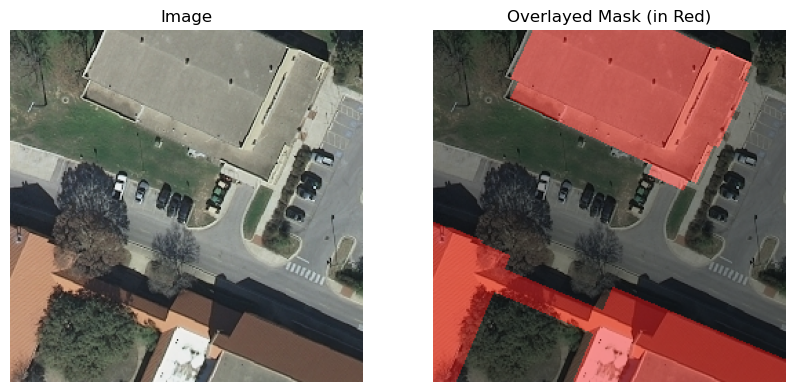

In [9]:
idx = 0
image, mask = dataset[idx]
visualize_augmentation(image,mask)

In [10]:
mask

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]]], dtype=torch.int32)

In [ ]:
len(dataset)

# Testing Lightning DataModule

In [11]:
import hydra
import lightning as pl
import omegaconf
from lightning import Callback, LightningDataModule, LightningModule, Trainer

In [13]:
cfg = omegaconf.OmegaConf.load("configs/data/building_data.yaml")
datamodule: LightningDataModule = hydra.utils.instantiate(cfg)
datamodule.setup()

In [14]:
data_train = datamodule.data_train
data_val = datamodule.data_val

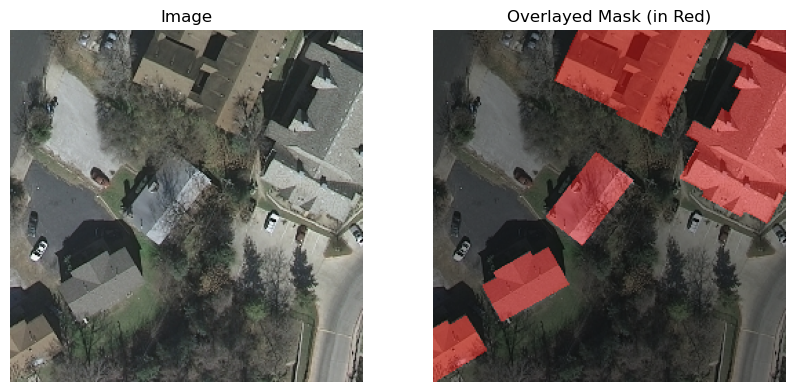

In [15]:
idx = 30
image, mask = data_train[idx]
visualize_augmentation(image,mask)

In [ ]:
idx = 30
image, mask = data_val[idx]
visualize_augmentation(image,mask)

In [ ]:
for data in datamodule.train_dataloader():
    break

In [ ]:
data[0].shape, data[1].shape

In [16]:
mask

tensor([[[0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]], dtype=torch.int32)